# Load and visualize output of the pretrained model

In [1]:
import os
import cv2
import numpy as np
import load_pretrained_model
from matplotlib import pyplot as plt 

In [2]:
path_patch = '../data/test_patches/patch_1.npy'
path_weights_h5 = '../weights/unet3d_Isomulti1v810.h5'

In [3]:
path_orthogonal_views_path = path_patch.replace(".npy", ".jpg")
assert os.path.exists(path_patch)
assert os.path.exists(path_orthogonal_views_path)
assert os.path.exists(path_weights_h5)

# Load network
network = load_pretrained_model.Unet(path_weights_h5)

# Load patch
patch_in = np.load(path_patch)

# Clips patch
patch_in = np.clip(patch_in, -500, 400)

# Gets prediction
pred = network(patch_in).astype('uint8')

Model: "model"
___________________________________________________________________________________________________________________
 Layer (type)                        Output Shape              Param #       Connected to                          
 input_1 (InputLayer)                [(None, 1, 132, 132, 132  0             []                                    
                                     )]                                                                            
                                                                                                                   
 conv3d (Conv3D)                     (None, 32, 130, 130, 130  896           ['input_1[0][0]']                     
                                     )                                                                             
                                                                                                                   
 conv3d_1 (Conv3D)                   (None, 64, 128, 128,

## Visualization of predictions

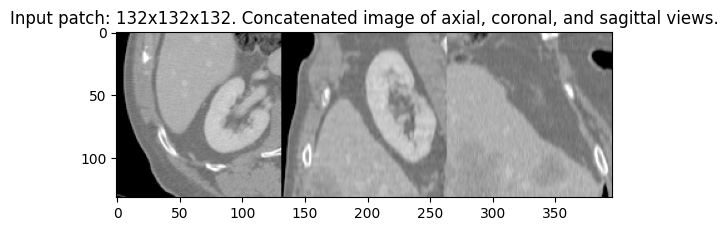

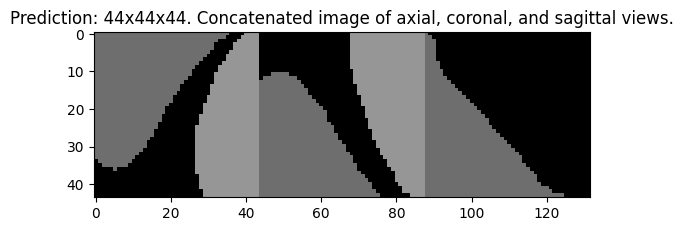

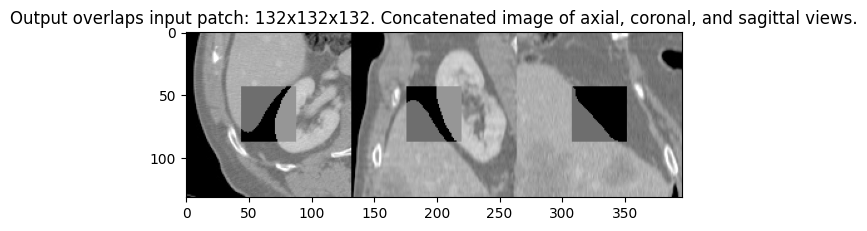

In [4]:
# Visualization of predictions in axial, coronal, and sagittal views
pred *= 10  # Makes the predictions brighter for visualization only
hcat_patch = cv2.imread(path_orthogonal_views_path)
hcat_patch = cv2.cvtColor(hcat_patch, cv2.COLOR_BGR2GRAY)
hcat_overlap = np.copy(hcat_patch)
hcat_pred = cv2.hconcat([pred[22, :, :], pred[:, 22, :], pred[:, :, 22]])
hcat_overlap[44:88, 44*1:44*1+44] = pred[22, :, :]
hcat_overlap[44:88, 44*4:44*4+44] = pred[:, 22, :]
hcat_overlap[44:88, 44*7:44*7+44] = pred[:, :, 22]

plt.title('Input patch: 132x132x132. Concatenated image of axial, coronal, and sagittal views.')
plt.imshow(hcat_patch, cmap='gray', vmax=255)
plt.show()

plt.title('Prediction: 44x44x44. Concatenated image of axial, coronal, and sagittal views.')
plt.imshow(hcat_pred, cmap='gray', vmax=255)
plt.show()
plt.title('Output overlaps input patch: 132x132x132. Concatenated image of axial, coronal, and sagittal views.')
plt.imshow(hcat_overlap, cmap='gray', vmax=255)
plt.show()

# Reutilize weights for transfer learning, including the last layer

In [5]:
import os
import change_num_classes

In [6]:
dst_net_classes = 5  # Number of classes of the new segmentation task, including background class
src_model_path = '../weights/unet3d_Isomulti1v810.h5'
dst_model_path = '../weights/unet3d_{}_classes.h5'.format(dst_net_classes)
assert os.path.exists(src_model_path)

In [7]:
change_num_classes.get_model_n_classes_from_pretrained_model(src_model_path, dst_model_path, dst_net_classes)

Model: "model_1"
___________________________________________________________________________________________________________________
 Layer (type)                        Output Shape              Param #       Connected to                          
 input_2 (InputLayer)                [(None, 1, 132, 132, 132  0             []                                    
                                     )]                                                                            
                                                                                                                   
 conv3d_14 (Conv3D)                  (None, 32, 130, 130, 130  896           ['input_2[0][0]']                     
                                     )                                                                             
                                                                                                                   
 conv3d_15 (Conv3D)                  (None, 64, 128, 12

Now you can use the output model on your dataset, it contains ``dst_net_classes`` classes.